In [1]:
from google.colab import files

uploaded = files.upload()

Saving plant_disease_dataset.csv to plant_disease_dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

**Load Dataset**

In [3]:
data = pd.read_csv('plant_disease_dataset.csv')

In [4]:
data.head(10)

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0
5,23.829315,32.289578,2.058564,5.727685,0
6,32.896064,50.008205,0.315200,7.843564,0
7,28.837174,32.183279,19.999401,7.880548,0
8,22.652628,31.523728,5.047287,5.047016,0
9,27.712800,48.185946,3.063416,4.426779,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


**Get Input and Output**

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
X

array([[27.48357077, 33.2150527 ,  0.57275778,  4.9758751 ],
       [24.30867849, 36.94500537, 42.52234633,  8.16526563],
       [28.23844269, 34.02618939, 16.09530324,  6.31673402],
       ...,
       [21.47341638, 81.89176985, 13.4268688 ,  7.10158325],
       [27.47882787, 88.56764865,  9.71965871,  7.73262046],
       [28.22194227, 71.90040098,  4.88639063,  4.3835364 ]])

In [8]:
y

array([1, 0, 1, ..., 0, 0, 0])

**B. Preprocessing**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train

array([[29.16589716, 87.10946544, 11.89816908,  6.88060716],
       [23.4997456 , 69.53151275,  1.03533858,  5.41528153],
       [25.38740259, 34.55711707,  6.0593308 ,  4.71017593],
       ...,
       [28.32708412, 51.56803949, 17.63093773,  5.59548253],
       [23.80697234, 77.05647583, 10.11743782,  5.20003054],
       [27.8144043 , 25.42700712,  5.73576103,  7.65344901]])

In [11]:
X_test

array([[ 25.8498727 ,  75.84868925,   3.80593787,   4.73975082],
       [ 31.03254483,  33.22988823,   4.18894341,   5.07533755],
       [ 26.03633665, 100.        ,   5.70581298,   5.83463584],
       ...,
       [ 14.73256726,  81.48125966,   1.33789635,   5.12665114],
       [ 27.0743275 , 100.        ,   8.32386945,   8.08399651],
       [ 27.36572727,  77.78641465,   0.58365431,   4.88155587]])

In [12]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

**Applying Feature Scaling**

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [15]:
X_train

array([[ 0.60702428,  1.10769269,  0.21773255,  0.48839843],
       [-0.36768708,  0.33249905, -0.88490351, -0.63676867],
       [-0.04296567, -1.20988359, -0.37494112, -1.1781921 ],
       ...,
       [ 0.46272871, -0.45969618,  0.79963958, -0.49839927],
       [-0.31483685,  0.66435246,  0.03697869, -0.80205162],
       [ 0.37453572, -1.61252452, -0.4077852 ,  1.08183392]])

**C. Building the model**

In [16]:
model = LogisticRegression(random_state = 0)

**Training the Model**

In [17]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Inferences**

In [18]:
y_pred = model.predict(sc.transform(X_test))

In [19]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
pred = model.predict(sc.transform([[15,4,1,51]])) # Removed the extra '12' to match 4 features

pred_value = int(pred[0])

print(f"fail = {pred_value}")

fail = 0


**D. Model Evaluation**

*Accuracy*

In [22]:
a = accuracy_score(y_test,y_pred)

print(f"Accuracy = {a*100}%")

Accuracy = 76.05%


*Confusion Matrix*

In [23]:
cm = confusion_matrix(y_test, y_pred)

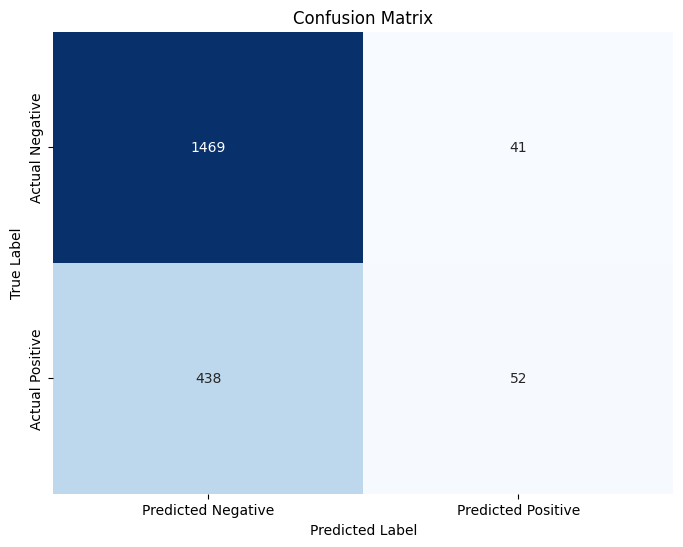

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

*Classification Report*

In [25]:
report = classification_report(y_test, y_pred, output_dict=True)

report = pd.DataFrame(report).transpose()

report

,precision,recall,f1-score,support
0,0.770320,0.972848,0.859819,1510.0000
1,0.559140,0.106122,0.178388,490.0000
accuracy,0.760500,0.760500,0.760500,0.7605
macro avg,0.664730,0.539485,0.519103,2000.0000
weighted avg,0.718581,0.760500,0.692868,2000.0000


*ROC CURVE*

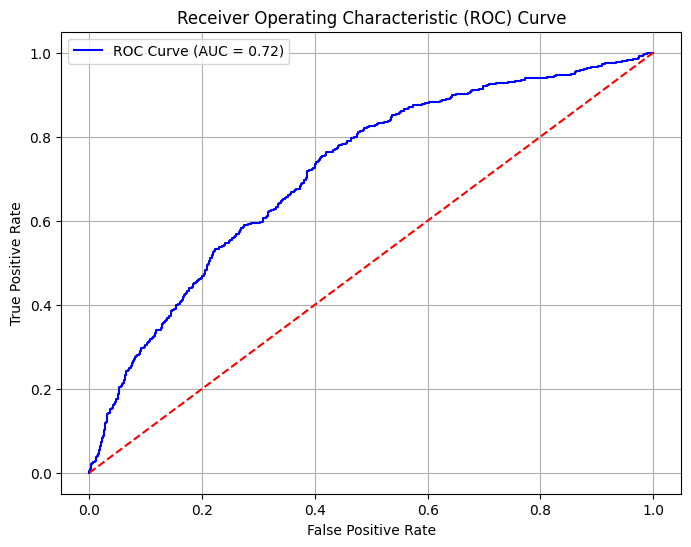

In [27]:
y_pred_proba = model.predict_proba(sc.transform(X_test))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

*Feature Importance*

Feature Importance (based on absolute coefficients):
       Feature  Importance
1     humidity    0.509281
2     rainfall    0.472921
3      soil_pH    0.194670
0  temperature    0.015357


/tmp/ipython-input-2599989833.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


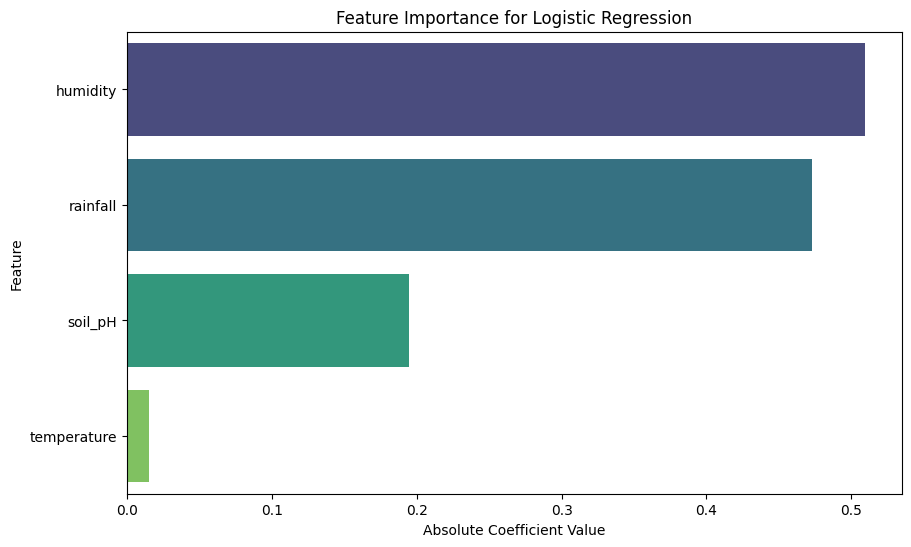

In [29]:
feature_names = data.columns[:-1]
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance (based on absolute coefficients):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

E. Insights

1. *Humidity and rainfall emerged as the most influential predictors of plant disease, exhibiting the highest positive coefficients in the model.*

2. *While the model showed strong performance in correctly identifying healthy plants (class 0), it struggled to recognize diseased plants (class 1), as indicated by the lower recall score.*

3. *Soil pH displayed a negative coefficient, implying that plants in more neutral or slightly alkaline soil conditions may face a reduced risk of disease.*

4. *The ROC curve and AUC value confirm that the model performs above chance level, although its predictive capability can still be enhanced.*

5. *Overall, the model serves as a solid and interpretable baseline for examining how environmental factors contribute to plant health classification.*